In [123]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

import pandas as pd
from learn.utils import FileHandler, get_file_suffix_map

In [137]:
epsilon_df = pd.read_csv('../experiments/epsilon_greedy_run_0/learning_out/intersection_0/action_hist.csv')
thompson_df = pd.read_csv('../experiments/thompson_run_0/learning_out/intersection_0/action_hist.csv')
ucb_df = pd.read_csv('../experiments/upper_confidence_bound_run_0/learning_out/intersection_0/action_hist.csv')

In [138]:
epsilon_target = epsilon_df[1:][['avg_lane_queueing_length', 'avg_lane_queueing_time']]
thompson_target = thompson_df[1:][['avg_lane_queueing_length', 'avg_lane_queueing_time']]
ucb_target = ucb_df[1:][['avg_lane_queueing_length', 'avg_lane_queueing_time']]

In [139]:
def moving_average_col_generation(target, length):
    target['roll_lane_length'] = target['avg_lane_queueing_length'].rolling(length).mean()
    target['roll_waiting_time'] = target['avg_lane_queueing_time'].rolling(length).mean()
    return target

In [140]:
epsilon_target = moving_average_col_generation(epsilon_target, 50)
thompson_target = moving_average_col_generation(thompson_target, 50)

<AxesSubplot: >

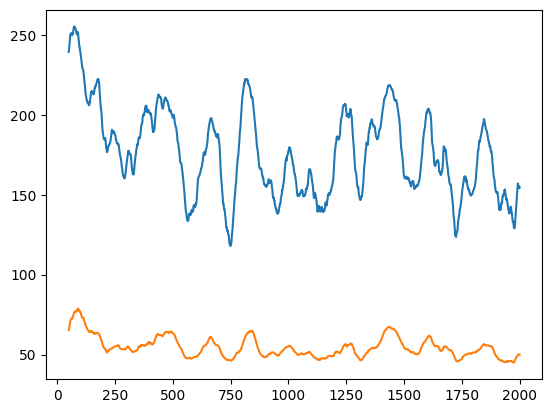

In [141]:
thompson_target['roll_lane_length'].plot()
thompson_target['roll_waiting_time'].plot()

<AxesSubplot: >

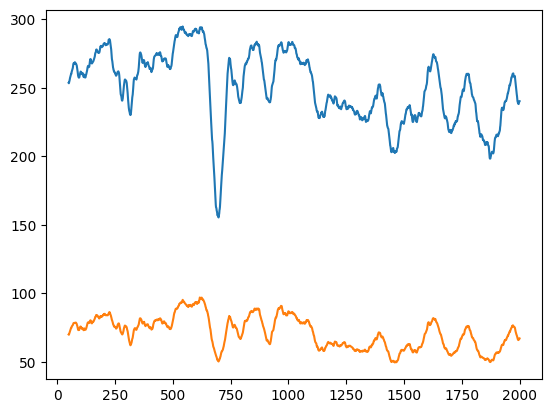

In [142]:
epsilon_target['roll_lane_length'].plot()
epsilon_target['roll_waiting_time'].plot()

This approach is not robust and stable becase each choice of the idividual light might affect each other

<AxesSubplot: >

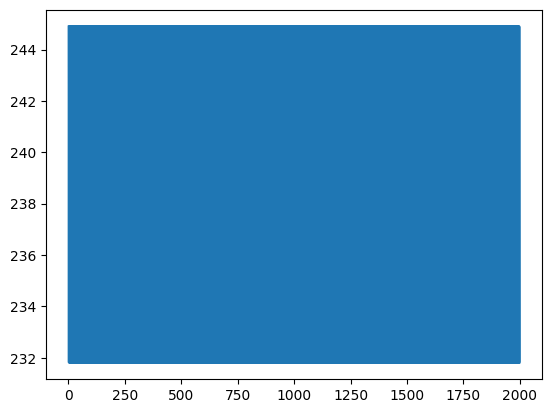

In [144]:
ucb_target['avg_lane_queueing_length'].plot()
# ucb_target['roll_waiting_time'].plot()